# Evaluating a classification model
**Note:** This notebook uses Python 3.9.1 and scikit-learn 0.23.2. The original notebook (shown in the video) used Python 2.7 and scikit-learn 0.16.

## Agenda

- What is the purpose of **model evaluation**, and what are some common evaluation procedures?
- What is the usage of **classification accuracy**, and what are its limitations?
- How does a **confusion matrix** describe the performance of a classifier?
- What **metrics** can be computed from a confusion matrix?
- How can you adjust classifier performance by **changing the classification threshold**?
- What is the purpose of an **ROC curve**?
- How does **Area Under the Curve (AUC)** differ from classification accuracy?

## Review of model evaluation

- Need a way to choose between models: different model types, tuning parameters, and features
- Use a **model evaluation procedure** to estimate how well a model will generalize to out-of-sample data
- Requires a **model evaluation metric** to quantify the model performance

### Model evaluation procedures

1. **Training and testing on the same data**
    - Rewards overly complex models that "overfit" the training data and won't necessarily generalize
2. **Train/test split**
    - Split the dataset into two pieces, so that the model can be trained and tested on different data
    - Better estimate of out-of-sample performance, but still a "high variance" estimate
    - Useful due to its speed, simplicity, and flexibility
3. **K-fold cross-validation**
    - Systematically create "K" train/test splits and average the results together
    - Even better estimate of out-of-sample performance
    - Runs "K" times slower than train/test split

### Model evaluation metrics

- **Regression problems:** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Classification problems:** Classification accuracy

## Classification accuracy

[Pima Indians Diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) originally from the UCI Machine Learning Repository

In [1]:
# added empty cell so that the cell numbering matches the video

In [2]:
# read the data into a pandas DataFrame
import pandas as pd
path = 'data/pima-indians-diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(path, header=None, names=col_names)

In [3]:
# print the first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Question:** Can we predict the diabetes status of a patient given their health measurements?

In [4]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [5]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [7]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

**Classification accuracy:** percentage of correct predictions

In [8]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [9]:
# examine the class distribution of the testing set (using a Pandas Series method)
print(y_test.value_counts())

0    130
1     62
Name: label, dtype: int64


In [10]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [11]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [12]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [13]:
# calculate null accuracy (for multi-class classification problems)
print(y_test.value_counts().head(1) / len(y_test))

0    0.677083
Name: label, dtype: float64


Comparing the **true** and **predicted** response values

In [14]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Confusion matrix

In [15]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


- Every observation in the testing set is represented in **exactly one box**
- It's a 2x2 matrix because there are **2 response classes**
- The format shown here is **not** universal

In [16]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

## Metrics computed from a confusion matrix

**Classification Accuracy:**

In [18]:
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


**Classification Error:**

In [19]:
print((FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


In [20]:
print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


In [21]:
print(TN / (TN + FP))

0.9076923076923077


**False Positive Rate:**

In [22]:
print(FP / (TN + FP))

0.09230769230769231


**Precision:**

In [23]:
print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


F1 score, Matthews correlation coefficient

## Adjusting the classification threshold

In [24]:
# print the first 10 predicted responses
print(logreg.predict(X_test)[0:10])

[0 0 0 0 0 0 0 1 0 1]


In [25]:
# print the first 10 predicted probabilities of class membership
print(logreg.predict_proba(X_test)[0:10, :])

[[0.63247571 0.36752429]
 [0.71643656 0.28356344]
 [0.71104114 0.28895886]
 [0.5858938  0.4141062 ]
 [0.84103973 0.15896027]
 [0.82934844 0.17065156]
 [0.50110974 0.49889026]
 [0.48658459 0.51341541]
 [0.72321388 0.27678612]
 [0.32810562 0.67189438]]


In [26]:
# print the first 10 predicted probabilities for class 1
print(logreg.predict_proba(X_test)[0:10, 1])

[0.36752429 0.28356344 0.28895886 0.4141062  0.15896027 0.17065156
 0.49889026 0.51341541 0.27678612 0.67189438]


In [27]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [28]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

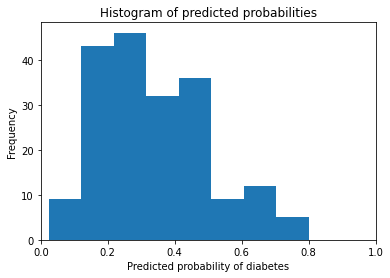

In [29]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

**Decrease the threshold** for predicting diabetes in order to **increase the sensitivity** of the classifier

In [30]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], threshold=0.3)[0]

In [31]:
# print the first 10 predicted probabilities
print(y_pred_prob[0:10])

[0.36752429 0.28356344 0.28895886 0.4141062  0.15896027 0.17065156
 0.49889026 0.51341541 0.27678612 0.67189438]


In [32]:
# print the first 10 predicted classes with the lower threshold
print(y_pred_class[0:10])

[1. 0. 0. 1. 0. 0. 1. 1. 0. 1.]


In [33]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[118  12]
 [ 47  15]]


In [34]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [35]:
# sensitivity has increased (used to be 0.24)
print(46 / (46 + 16))

0.7419354838709677


In [36]:
# specificity has decreased (used to be 0.91)
print(80 / (80 + 50))

0.6153846153846154


## ROC Curves and Area Under the Curve (AUC)

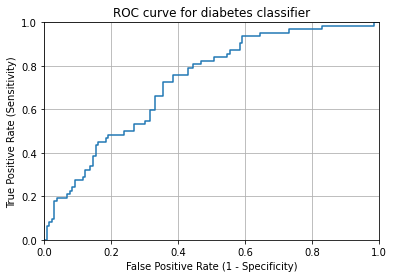

In [74]:
# first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [85]:
print(f'fpr: {fpr}')
print(f'tpr: {tpr}')

fpr: [0.         0.00769231 0.00769231 0.01538462 0.01538462 0.02307692
 0.02307692 0.03076923 0.03076923 0.03846154 0.03846154 0.06923077
 0.06923077 0.07692308 0.07692308 0.08461538 0.08461538 0.09230769
 0.09230769 0.11538462 0.11538462 0.12307692 0.12307692 0.13846154
 0.13846154 0.14615385 0.14615385 0.15384615 0.15384615 0.16153846
 0.16153846 0.18461538 0.18461538 0.19230769 0.19230769 0.23846154
 0.23846154 0.26923077 0.26923077 0.3        0.3        0.31538462
 0.31538462 0.33076923 0.33076923 0.35384615 0.35384615 0.38461538
 0.38461538 0.43076923 0.43076923 0.44615385 0.44615385 0.46923077
 0.46923077 0.50769231 0.50769231 0.54615385 0.54615385 0.55384615
 0.55384615 0.58461538 0.58461538 0.59230769 0.59230769 0.64615385
 0.64615385 0.73076923 0.73076923 0.83076923 0.83076923 0.98461538
 0.98461538 1.        ]
tpr: [0.         0.         0.06451613 0.06451613 0.08064516 0.08064516
 0.09677419 0.09677419 0.17741935 0.17741935 0.19354839 0.19354839
 0.20967742 0.20967742 0.225

- ROC curve can help you to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually **see the thresholds** used to generate the curve on the ROC curve itself

In [ ]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [39]:
evaluate_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [40]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [41]:
# first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


- AUC is useful as a **single number summary** of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

In [42]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7378233618233618